 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [96]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import datetime as dt
from scipy import stats
import sys
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [97]:
# Reading whale returns
df_whale_returns = pd.read_csv("C:/Users/Val/Desktop/python-pandas-homework/whale_returns.csv" , index_col = "Date" ,  parse_dates=True, infer_datetime_format=True)

In [98]:
# Count nulls
df_whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [99]:
# Drop nulls
zero_returns = df_whale_returns[df_whale_returns["SOROS FUND MANAGEMENT LLC"]==0].index
df_whale_returns.drop(zero_returns , inplace = True)
df_whale_returns.reset_index()
df_whale_returns = df_whale_returns.dropna().pct_change().dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [100]:
# Reading algorithmic returns
df_algo_returns = pd.read_csv("C:/Users/Val/Desktop/python-pandas-homework/algo_returns.csv" , index_col = "Date" , parse_dates=True, infer_datetime_format=True)

In [101]:
# Count nulls
df_algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [102]:
# Drop nulls
df_algo_returns = df_algo_returns.dropna().pct_change().dropna()

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [103]:
# Reading S&P 500 Closing Prices
df_sp500_returns = pd.read_csv("C:/Users/Val/Desktop/python-pandas-homework/sp500_history.csv"  , parse_dates=True, infer_datetime_format=True)

In [104]:
# Check Data Types
df_sp500_returns.dtypes

Date     object
Close    object
dtype: object

In [105]:
# Fix Data Types
df_sp500_returns['Date'] = pd.to_datetime(df_sp500_returns['Date'])
df_sp500_returns['Close']  = df_sp500_returns['Close'].replace('[\$,]', '', regex=True).astype(float)
df_sp500_returns.set_index('Date' , inplace = True)

In [106]:
# Calculate Daily Returns
# Drop nulls
df_sp500_returns = df_sp500_returns.dropna().pct_change().dropna()

In [107]:
# Rename `Close` Column to be specific to this portfolio.
df_sp500_returns.rename(columns = {'Close':'S&P 500'}, inplace = True)

In [108]:
df_whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Combine Whale, Algorithmic, and S&P 500 Returns

In [109]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

pd.options.display.max_rows
pd.set_option('display.max_rows',None)
combined_df =pd.concat([df_whale_returns,df_algo_returns,df_sp500_returns], axis='columns' , join = 'inner')
combined_df = combined_df.fillna(0)

combined_df = combined_df[(np.abs(stats.zscore(combined_df)) < 2).all(axis=1)]
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-0.001195
2015-03-05,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231,0.014378
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914,-0.003929
2015-03-10,-18.625495,-2.263954,-3.067380,4.893672,-0.744524,-10.327163,0.001921
2015-03-11,-1.390912,-1.966750,-1.274177,-0.882260,-3.151399,-1.049752,-0.012445
2015-03-12,1.060018,0.989412,2.960622,-10.419761,-1.980244,18.292235,0.006112
2015-03-13,-1.302164,-1.139064,-1.281865,-1.753810,0.847814,-1.433827,-0.013353
2015-03-16,-4.163697,-3.508046,-3.151096,-1.989242,-0.373997,-1.813462,0.003331
2015-03-17,-0.728894,-0.182672,-1.086405,-0.952281,-0.168830,-0.690667,-0.012012


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

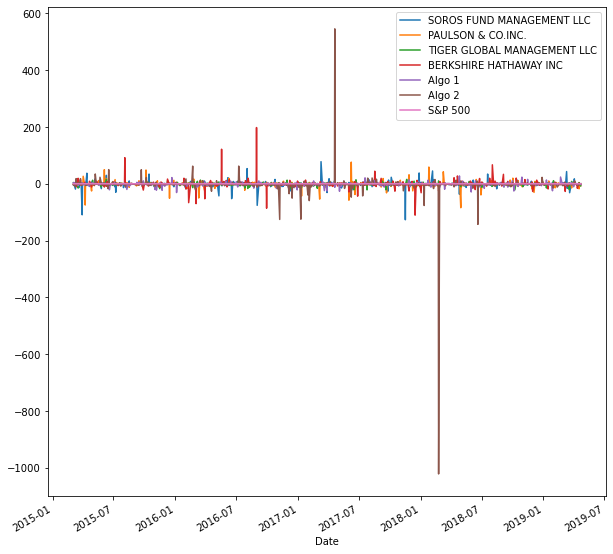

In [110]:
combined_df.plot(figsize=(10, 10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:>

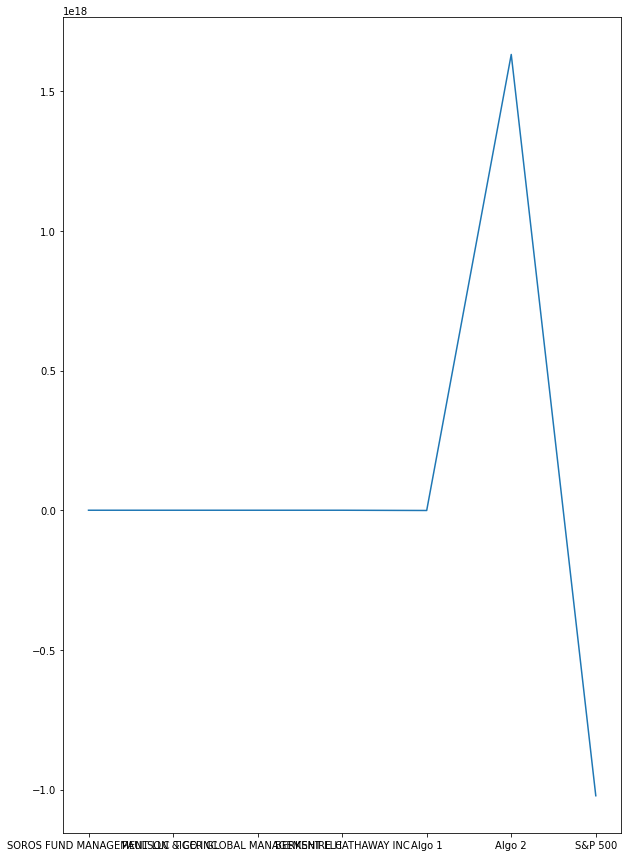

In [111]:
# Calculate cumulative returns of all portfolios
cumulative_returns_df = combined_df.sum(axis = 0)
cr = np.cumprod(cumulative_returns_df , axis =0)
# Plot cumulative returns
cr.plot(figsize=(10, 15))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

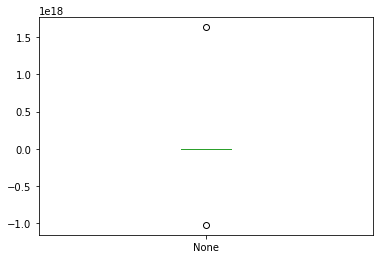

In [112]:
# Box plot to visually show risk
cr.plot.box()

### Calculate Standard Deviations

In [113]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_df.std()
daily_std

SOROS FUND MANAGEMENT LLC       9.270005
PAULSON & CO.INC.               8.393702
TIGER GLOBAL MANAGEMENT LLC     3.617263
BERKSHIRE HATHAWAY INC         11.824835
Algo 1                          4.657418
Algo 2                         40.200413
S&P 500                         0.006196
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [114]:
# Calculate  the daily standard deviation of S&P 500
# Determine which portfolios are riskier than the S&P 500
daily_std = daily_std.sort_values(ascending=False)
daily_std.head()

Algo 2                       40.200413
BERKSHIRE HATHAWAY INC       11.824835
SOROS FUND MANAGEMENT LLC     9.270005
PAULSON & CO.INC.             8.393702
Algo 1                        4.657418
dtype: float64

### Calculate the Annualized Standard Deviation

In [115]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

Algo 2                       638.161775
BERKSHIRE HATHAWAY INC       187.713434
SOROS FUND MANAGEMENT LLC    147.156772
PAULSON & CO.INC.            133.245893
Algo 1                        73.934219
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

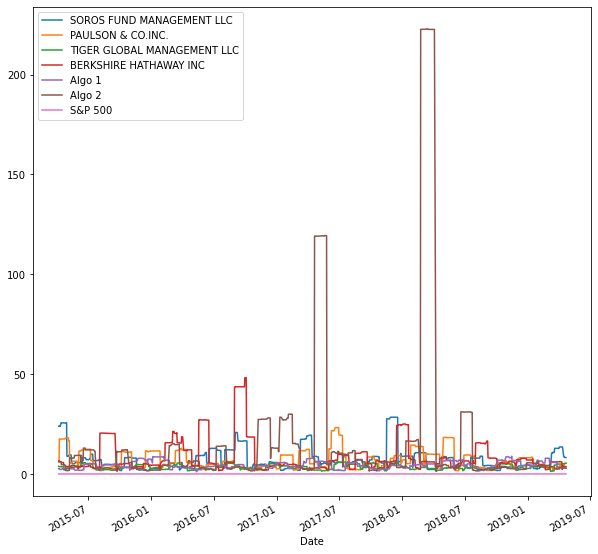

In [116]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df.rolling(window=21).std().plot(figsize = (10,10))
# Plot the rolling standard deviation

### Calculate and plot the correlation

<AxesSubplot:>

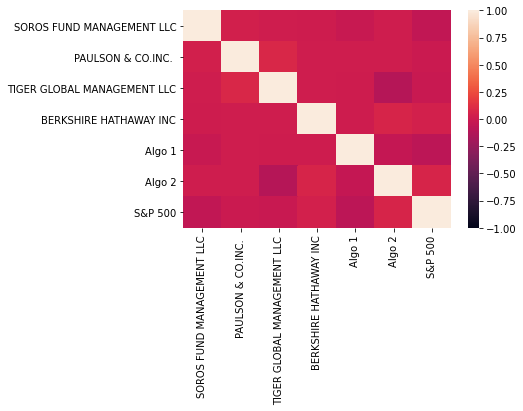

In [117]:
# Calculate the correlation
correlation = combined_df.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin = -1, vmax = 1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

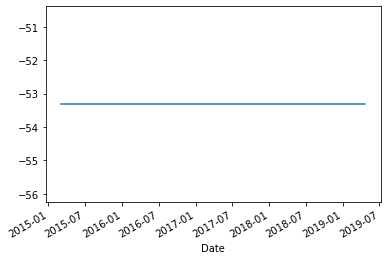

In [118]:
# Calculate covariance of a single portfolio
combined_df['covariance_Algo_1'] = combined_df['Algo 1'].cov(combined_df['S&P 500'])
#covariance
# Calculate variance of S&P 500
combined_df['variance'] = combined_df['S&P 500'].var()
# Computing beta
combined_df['algo_1_beta'] = combined_df['covariance_Algo_1'] / combined_df['variance']
# Plot beta trend
combined_df["algo_1_beta"].plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [119]:
# Use `ewm` to calculate the rolling window
EWM = combined_df.ewm(halflife=21 , axis = 1)
EWM

ExponentialMovingWindow [com=29.799346392775035,min_periods=1,adjust=True,ignore_na=False,axis=1]

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [120]:
combined_sharpe_ratio = pd.DataFrame()

combined_df["sharpe_ratios_SOROS FUND MANAGEMENT LLC"] = ((combined_df["SOROS FUND MANAGEMENT LLC"].mean()) * 252) / (combined_df["SOROS FUND MANAGEMENT LLC"].std() * np.sqrt(252))
combined_df["sharpe_ratios_PAULSON & CO.INC. "] = ((combined_df["PAULSON & CO.INC. "].mean()) * 252) / (combined_df["PAULSON & CO.INC. "].std() * np.sqrt(252))
combined_df["sharpe_ratios_TIGER GLOBAL MANAGEMENT LLC"] = ((combined_df["TIGER GLOBAL MANAGEMENT LLC"].mean()) * 252) / (combined_df["TIGER GLOBAL MANAGEMENT LLC"].std() * np.sqrt(252))
combined_df["sharpe_ratios_BERKSHIRE HATHAWAY INC"] = ((combined_df["BERKSHIRE HATHAWAY INC"].mean()) * 252) / (combined_df["BERKSHIRE HATHAWAY INC"].std() * np.sqrt(252))
combined_df["sharpe_ratios_algo_1"] = ((combined_df["Algo 1"].mean()) * 252) / (combined_df["Algo 1"].std() * np.sqrt(252))
combined_df["sharpe_ratios_algo_2"] = ((combined_df["Algo 2"].mean()) * 252) / (combined_df["Algo 2"].std() * np.sqrt(252))
combined_df["sharpe_ratios_S&P 500"] = ((combined_df["S&P 500"].mean()) * 252) / (combined_df["S&P 500"].std() * np.sqrt(252))

combined_sharpe_ratio = combined_df.iloc[:,10:]
combined_sharpe_ratio = combined_sharpe_ratio.drop_duplicates().transpose()

<AxesSubplot:title={'center':'Sharpe Ratios'}>

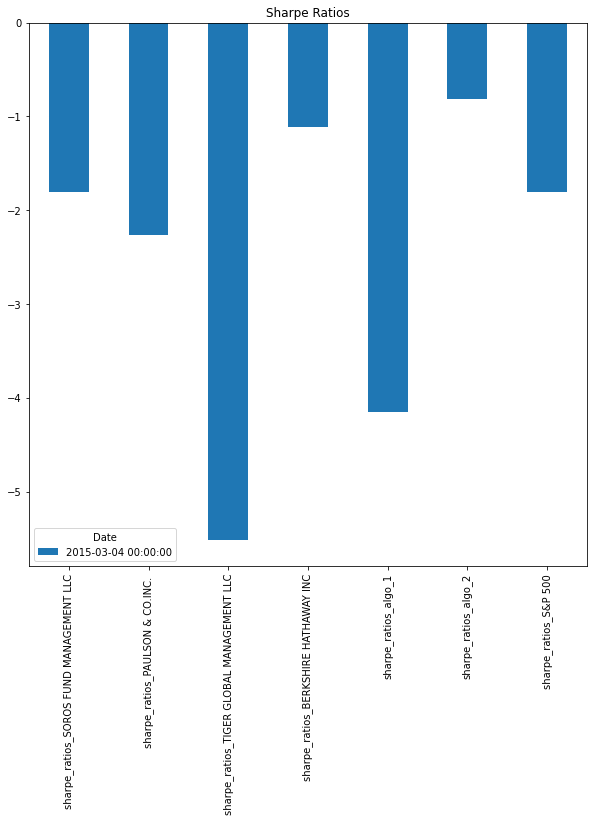

In [121]:
# Visualize the sharpe ratios as a bar plot
combined_sharpe_ratio.plot(kind="bar", title="Sharpe Ratios", figsize = (10,10))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

The maximum value belong to Algo 2 . However, since they all negative I would not invest at all. If forced to invest, it would be Algo 2

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [122]:
# Reading data from 1st stock
df_goog_returns = pd.read_csv("C:/Users/Val/Desktop/python-pandas-homework/goog_historical.csv" , index_col = "Trade DATE",  parse_dates=True, infer_datetime_format=True)

In [123]:
# Reading data from 2nd stock
df_aapl_returns = pd.read_csv("C:/Users/Val/Desktop/python-pandas-homework/aapl_historical.csv" , index_col = "Trade DATE",  parse_dates=True, infer_datetime_format=True)

In [124]:
# Reading data from 3rd stock
df_cost_returns = pd.read_csv("C:/Users/Val/Desktop/python-pandas-homework/cost_historical.csv" , index_col = "Trade DATE",  parse_dates=True, infer_datetime_format=True)

In [125]:
# Combine all stocks in a single DataFrame
custom_portfolio =pd.concat([df_goog_returns,df_aapl_returns,df_cost_returns], axis='columns' , join = 'inner')

In [126]:
# Reorganize portfolio data by having a column per symbol

custom_portfolio_column_list = ['GOOG', 'AAPL', 'COST']

custom_portfolio = custom_portfolio.iloc[:,[1,3,5]]

custom_portfolio.columns = custom_portfolio_column_list

custom_portfolio



,GOOG,AAPL,COST
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62
2019-05-02,1162.61,209.15,242.69
2019-05-01,1168.08,210.52,241.59
2019-04-30,1188.48,200.67,245.53
2019-04-29,1287.58,204.61,244.28


In [127]:
# Calculate daily returns
daily_returns = custom_portfolio.dropna().pct_change().dropna()
# Drop NAs
# Display sample data
daily_returns.head()

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-08,0.003347,0.010861,-0.008749
2019-05-07,0.006714,-0.000197,-0.004806
2019-05-06,0.013023,0.027704,0.016862
2019-05-03,-0.003355,0.015685,0.001597
2019-05-02,-0.019226,-0.012279,-0.007890


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [128]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

daily_returns["Portfolio_Return"] = (daily_returns["GOOG"] * .3333) + (daily_returns["AAPL"] * .3333) + (daily_returns["COST"] * .3333)

daily_returns["Portfolio_Return"] = daily_returns["Portfolio_Return"].sum()


#df1.groupby(['State'])['Sales'].sum()



#orders_df.Prices * orders_df.Amount * orders_df.C

# Display sample data
#daily_returns.head()

#agg_return
custom_portfolio_returns = daily_returns


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [129]:
# Join your returns DataFrame to the original returns DataFrame

combined_with_custom_df =pd.concat([combined_df,custom_portfolio_returns], axis='columns' , join = 'inner')


In [130]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_with_custom_df.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,covariance_Algo_1,variance,algo_1_beta,...,sharpe_ratios_PAULSON & CO.INC.,sharpe_ratios_TIGER GLOBAL MANAGEMENT LLC,sharpe_ratios_BERKSHIRE HATHAWAY INC,sharpe_ratios_algo_1,sharpe_ratios_algo_2,sharpe_ratios_S&P 500,GOOG,AAPL,COST,Portfolio_Return
2018-05-11,-1.485123,-0.905581,-0.726434,-2.029961,-0.947068,-0.806509,-0.000883,-0.002047,0.000038,-53.319492,...,-2.268837,-5.521226,-1.107235,-4.154986,-0.816187,-1.805366,-0.001763,0.002339,-0.000613,-0.078836
2018-05-15,-0.846100,-2.434550,-2.215277,2.541186,-2.240373,-1.696589,-0.004044,-0.002047,0.000038,-53.319492,...,-2.268837,-5.521226,-1.107235,-4.154986,-0.816187,-1.805366,-0.002348,-0.009246,-0.016255,-0.078836
2018-05-16,-12.898756,-5.432331,-2.717996,-1.295083,1.050169,-3.933589,0.000857,-0.002047,0.000038,-53.319492,...,-2.268837,-5.521226,-1.107235,-4.154986,-0.816187,-1.805366,0.002948,0.006364,-0.004459,-0.078836
2018-05-17,-1.226402,-0.595815,-2.143738,-2.192535,1.987055,0.557966,0.002639,-0.002047,0.000038,-53.319492,...,-2.268837,-5.521226,-1.107235,-4.154986,-0.816187,-1.805366,0.011469,0.003650,0.003217,-0.078836
2018-05-18,1.228260,-2.058872,1.047487,-0.569648,-1.368007,-1.479620,-0.007333,-0.002047,0.000038,-53.319492,...,-2.268837,-5.521226,-1.107235,-4.154986,-0.816187,-1.805366,-0.012246,-0.007035,-0.003306,-0.078836
2018-05-21,-1.574523,-0.552753,-0.910150,-5.688231,-2.209175,-2.972432,0.003146,-0.002047,0.000038,-53.319492,...,-2.268837,-5.521226,-1.107235,-4.154986,-0.816187,-1.805366,0.009208,0.002511,0.003267,-0.078836
2018-05-22,-1.936808,-1.977019,-0.792138,-1.236702,-4.632835,-2.143030,-0.003238,-0.002047,0.000038,-53.319492,...,-2.268837,-5.521226,-1.107235,-4.154986,-0.816187,-1.805366,-0.009225,-0.006371,0.004189,-0.078836
2018-05-24,1.403311,2.385225,-0.826136,-0.797858,-1.513785,-1.571314,0.002363,-0.002047,0.000038,-53.319492,...,-2.268837,-5.521226,-1.107235,-4.154986,-0.816187,-1.805366,0.003328,-0.002280,0.002672,-0.078836
2018-05-25,-1.993546,-1.968992,8.430468,-1.408013,-2.061762,0.431598,0.011699,-0.002047,0.000038,-53.319492,...,-2.268837,-5.521226,-1.107235,-4.154986,-0.816187,-1.805366,0.014467,0.003619,0.008234,-0.078836
2018-05-29,-5.992674,-3.454794,-2.129295,9.492798,-0.843136,2.449505,-0.012537,-0.002047,0.000038,-53.319492,...,-2.268837,-5.521226,-1.107235,-4.154986,-0.816187,-1.805366,-0.007005,0.002133,-0.014526,-0.078836


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [131]:
# Calculate the annualized `std`
combined_with_custom_df["cust_std"] = combined_with_custom_df["Portfolio_Return"].std()

combined_with_custom_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,covariance_Algo_1,variance,algo_1_beta,...,sharpe_ratios_TIGER GLOBAL MANAGEMENT LLC,sharpe_ratios_BERKSHIRE HATHAWAY INC,sharpe_ratios_algo_1,sharpe_ratios_algo_2,sharpe_ratios_S&P 500,GOOG,AAPL,COST,Portfolio_Return,cust_std
2018-05-11,-1.485123,-0.905581,-0.726434,-2.029961,-0.947068,-0.806509,-0.000883,-0.002047,0.000038,-53.319492,...,-5.521226,-1.107235,-4.154986,-0.816187,-1.805366,-0.001763,0.002339,-0.000613,-0.078836,2.365235e-16
2018-05-15,-0.846100,-2.434550,-2.215277,2.541186,-2.240373,-1.696589,-0.004044,-0.002047,0.000038,-53.319492,...,-5.521226,-1.107235,-4.154986,-0.816187,-1.805366,-0.002348,-0.009246,-0.016255,-0.078836,2.365235e-16
2018-05-16,-12.898756,-5.432331,-2.717996,-1.295083,1.050169,-3.933589,0.000857,-0.002047,0.000038,-53.319492,...,-5.521226,-1.107235,-4.154986,-0.816187,-1.805366,0.002948,0.006364,-0.004459,-0.078836,2.365235e-16
2018-05-17,-1.226402,-0.595815,-2.143738,-2.192535,1.987055,0.557966,0.002639,-0.002047,0.000038,-53.319492,...,-5.521226,-1.107235,-4.154986,-0.816187,-1.805366,0.011469,0.003650,0.003217,-0.078836,2.365235e-16
2018-05-18,1.228260,-2.058872,1.047487,-0.569648,-1.368007,-1.479620,-0.007333,-0.002047,0.000038,-53.319492,...,-5.521226,-1.107235,-4.154986,-0.816187,-1.805366,-0.012246,-0.007035,-0.003306,-0.078836,2.365235e-16
2018-05-21,-1.574523,-0.552753,-0.910150,-5.688231,-2.209175,-2.972432,0.003146,-0.002047,0.000038,-53.319492,...,-5.521226,-1.107235,-4.154986,-0.816187,-1.805366,0.009208,0.002511,0.003267,-0.078836,2.365235e-16
2018-05-22,-1.936808,-1.977019,-0.792138,-1.236702,-4.632835,-2.143030,-0.003238,-0.002047,0.000038,-53.319492,...,-5.521226,-1.107235,-4.154986,-0.816187,-1.805366,-0.009225,-0.006371,0.004189,-0.078836,2.365235e-16
2018-05-24,1.403311,2.385225,-0.826136,-0.797858,-1.513785,-1.571314,0.002363,-0.002047,0.000038,-53.319492,...,-5.521226,-1.107235,-4.154986,-0.816187,-1.805366,0.003328,-0.002280,0.002672,-0.078836,2.365235e-16
2018-05-25,-1.993546,-1.968992,8.430468,-1.408013,-2.061762,0.431598,0.011699,-0.002047,0.000038,-53.319492,...,-5.521226,-1.107235,-4.154986,-0.816187,-1.805366,0.014467,0.003619,0.008234,-0.078836,2.365235e-16
2018-05-29,-5.992674,-3.454794,-2.129295,9.492798,-0.843136,2.449505,-0.012537,-0.002047,0.000038,-53.319492,...,-5.521226,-1.107235,-4.154986,-0.816187,-1.805366,-0.007005,0.002133,-0.014526,-0.078836,2.365235e-16


<AxesSubplot:>

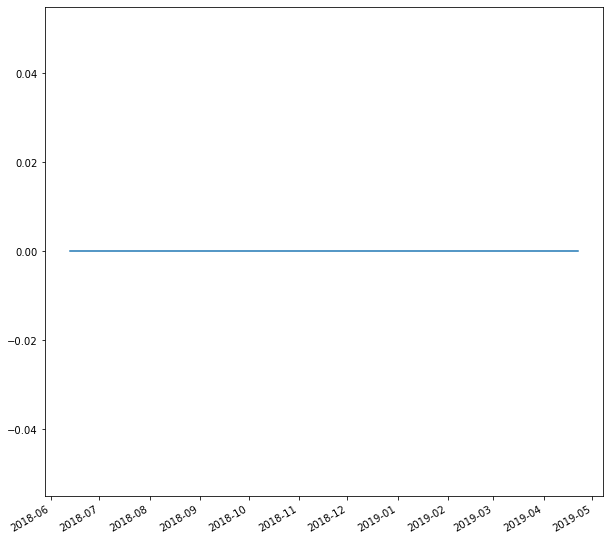

In [132]:
# Calculate rolling standard deviation

combined_with_custom_df["cust_std"].rolling(window=21).std().plot(figsize = (10,10))


# Plot rolling standard deviation


### Calculate and plot the correlation

<AxesSubplot:>

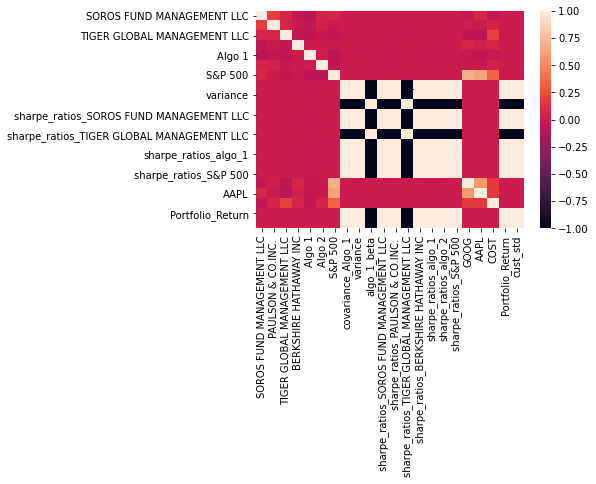

In [133]:
# Calculate and plot the correlation

correlation = combined_with_custom_df.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin = -1, vmax = 1)


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:>

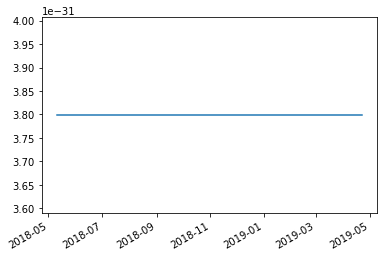

In [134]:
# Calculate and plot Beta

combined_with_custom_df['covariance_Portfolio_Return'] = combined_with_custom_df['Portfolio_Return'].cov(combined_with_custom_df['S&P 500'])


#covariance
# Calculate variance of S&P 500

combined_with_custom_df['variance'] = combined_with_custom_df['S&P 500'].var()

#print(variance)
# Computing beta

combined_with_custom_df['Portfolio_Return_beta'] = combined_with_custom_df['covariance_Portfolio_Return'] / combined_with_custom_df['variance']

combined_with_custom_df

combined_with_custom_df['Portfolio_Return_beta'].plot()


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [135]:
# Calculate Annualzied Sharpe Ratios

combined_with_custom_df["sharpe_ratios_custom"] = ((combined_with_custom_df["Portfolio_Return"].mean()) * 252) / (combined_with_custom_df["Portfolio_Return"].std() * np.sqrt(252))
list_of_col = ['sharpe_ratios_SOROS FUND MANAGEMENT LLC','sharpe_ratios_PAULSON & CO.INC. ','sharpe_ratios_TIGER GLOBAL MANAGEMENT LLC','sharpe_ratios_BERKSHIRE HATHAWAY INC', 'sharpe_ratios_algo_1','sharpe_ratios_algo_2', 'sharpe_ratios_S&P 500','sharpe_ratios_custom']
combined_with_custom_df = combined_with_custom_df[list_of_col]
combined_with_custom_df = combined_with_custom_df.drop_duplicates().transpose()


In [136]:
combined_with_custom_df

,2018-05-11
sharpe_ratios_SOROS FUND MANAGEMENT LLC,-1.804704e+00
sharpe_ratios_PAULSON & CO.INC.,-2.268837e+00
sharpe_ratios_TIGER GLOBAL MANAGEMENT LLC,-5.521226e+00
sharpe_ratios_BERKSHIRE HATHAWAY INC,-1.107235e+00
sharpe_ratios_algo_1,-4.154986e+00
sharpe_ratios_algo_2,-8.161867e-01
sharpe_ratios_S&P 500,-1.805366e+00
sharpe_ratios_custom,-5.291150e+15


<AxesSubplot:title={'center':'Sharpe Ratios'}>

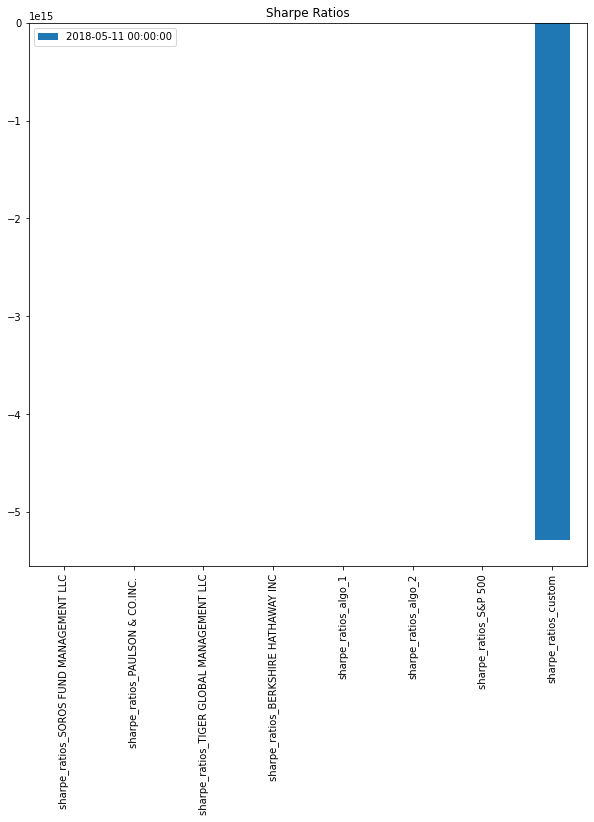

In [137]:
# Visualize the sharpe ratios as a bar plot
combined_with_custom_df.plot(kind="bar", title="Sharpe Ratios", figsize = (10,10))

### How does your portfolio do?

Write your answer here!

In [54]:
print("definitely Custom")

definitely Custom
